# Requirements

keras==2.14.0

numpy==1.26.1

tensorflow==2.14.0

# Imports

In [2]:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


# convnets


**TRANSLATION INVARIANT**
- The patterns (edges, textures, colors) they learn are translation invariant. The network has the ability recognize the same pattern or feature regardless of its position in the input image.

**SPATIAL HIERARCHIES**
- They can learn spatial hierarchies of patterns. It is their ability to learn complex patterns or features by building upon simpler patterns detected at lower layers.

A convolutional neural network (CNN), which is specifically designed to work with image data. It's more suitable for tasks where the input data is structured in multiple dimensions, such as images represented as grids of pixels.

**Conv2D**

- a fundamental building block used for feature extraction from input images. 
- Convolution Operation: At its core, the Conv2D layer performs a convolution operation between the input image and a set of learnable filters (also known as kernels or convolutional kernels). Each filter is a small matrix of weights.
- Feature Map: The convolution operation is applied by sliding each filter over the input image and computing the dot product between the filter and the input patch at each position. This produces a feature map, which is a 2D representation of the activations of that filter across the input image.
- Multiple Filters: Typically, a Conv2D layer has multiple filters, and each filter learns to detect a different pattern or feature in the input image. For example, early filters might learn to detect edges or corners, while deeper filters might learn more complex patterns.
- Parameters: The weights of the filters in the Conv2D layer are the parameters that are learned during the training process. The goal of training is to learn filters that can extract meaningful features from the input images for the task at hand (e.g., classification, object detection).
- Padding: Optionally, the Conv2D layer can apply padding to the input image before performing the convolution operation. Padding adds extra rows and columns of zeros around the input image, which helps preserve spatial dimensions and prevent information loss at the edges of the image.
- Strides: Additionally, the Conv2D layer can use a stride parameter to specify the step size of the filter as it slides over the input image. Larger stride values result in downsampling of the feature map, reducing its spatial dimensions.

`Conv2D(output_depth, (window_height, window_width))`

`input_shape=(image_height, image_width, image_channels)`

Example:
- output_depth = 32: This number represents the number of filters (also known as kernels or convolutional channels) in the convolutional layer. Each filter is a small matrix that is applied to the input image to extract features. Having multiple filters allows the network to learn different features at each location in the input image. In this case, there are 32 filters in the convolutional layer.
- (window_height, window_width) = (3, 3): This tuple represents the size of each filter in the convolutional layer. Each filter is a small matrix with dimensions specified by this tuple. In this case, each filter is a 3x3 matrix.

`model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))`

**MaxPooling2D**
- a convolutional neural network (CNN) is to downsample the input representation, reducing its spatial dimensions. This helps in reducing the computational complexity of the network, as well as providing a form of translation invariance.
- Here's how the MaxPooling2D layer works: It operates on each feature map independently. For each region of the input feature map specified by the pool size (in this case, (2, 2)), the maximum value within that region is retained. The output of the operation is a downsampled version of the input feature map, where the spatial dimensions are reduced by a factor determined by the pool size.
- For example, if you have a (6, 6) input feature map and apply MaxPooling2D((2, 2)), you'll get a (3, 3) output feature map, as each (2, 2) region is reduced to a single value (the maximum value in that region).
- The purpose of this downsampling operation is to: Reduce the number of parameters in the network, thus reducing computational complexity and memory requirements. Increase the receptive field of later layers, allowing them to capture more abstract features by aggregating information from larger regions of the input. Provide a form of translation invariance, making the network more robust to small variations in the position of features within the input images.

`model.add(layers.MaxPooling2D((2, 2)))`

The output of MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The 3D (3, 3, 32) outputs are flattened into 1D vector of shape (288,) before going through two Dense layers.

`model.add(layers.Flatten())`

The next step is to feed the last output tensor (of shape (3, 3, 32)) into a densely connected classifier network. Do i.e. the 10-way classification, using a final layer with 10 outputs and a softmax activation.

`model.add(layers.Dense(64, activation='relu'))`
`model.add(layers.Dense(10, activation='softmax'))`

See the model architecture:

`model.summary()`


## Common

In [3]:

def prepare_images_for_convnet(dir_images: str, images_names: list[str]) -> np.array:
    print(f"Preparing images form directory {dir_images}")
          
    loaded_images: list[np.ndarray] = list()
    
    for image_name in images_names:
        image: np.ndarray = cv2.imread(dir_images + image_name)

        try:
            image: np.ndarray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image: np.ndarray = image / 255.0  # Normalize pixel values to [0, 1]

            loaded_images.append(image)

        except Exception as e:
            print(f"Unable to load image {image_name}, {e}")

    loaded_images = np.array(loaded_images)

    print(f"Expected no. of images: {len(images_names)}")
    print(f"Loaded no. of images: {len(loaded_images)}")

    image_sample: np.ndarray = loaded_images[0]

    # Plot the image
    plt.imshow(image_sample)
    plt.axis('off')  # Turn off axis labels
    plt.show()

    return loaded_images


## Train CNN with TensorFlow

In [4]:

import tensorflow as tf


2024-03-17 10:49:42.123525: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Preparing images form directory ./data/images_with_padding/cup/
Expected no. of images: 12
Loaded no. of images: 12


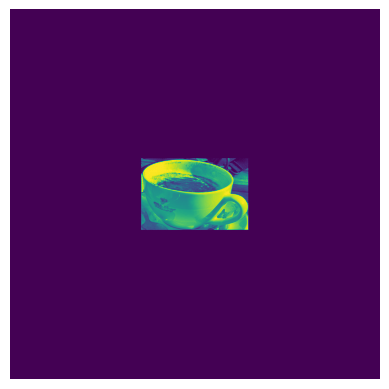

Preparing images form directory ./data/images_with_padding/cup/
Expected no. of images: 6
Loaded no. of images: 6


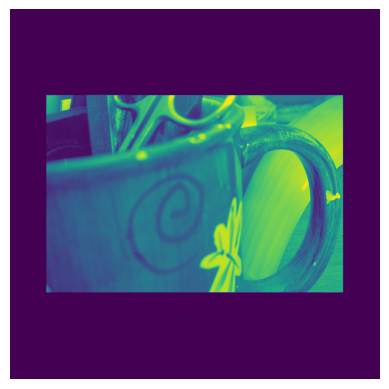

Preparing images form directory ./data/images_with_padding/apple/
Expected no. of images: 12
Loaded no. of images: 12


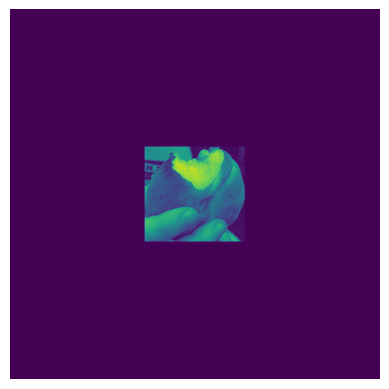

Preparing images form directory ./data/images_with_padding/apple/
Expected no. of images: 6
Loaded no. of images: 6


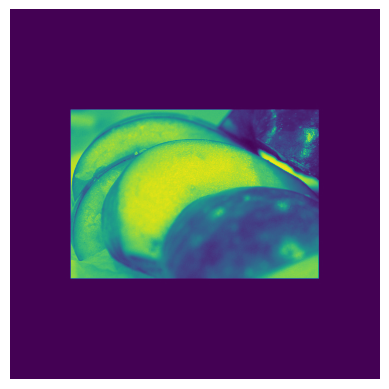

In [5]:

# load data
base_path: str = "./data/images_with_padding/"

train_images_names_cup: list[str] = [
    "cropped_train_image_cropped_train_image_127_0.jpg",
    "cropped_train_image_cropped_train_image_3464_0.jpg",
    "cropped_train_image_cropped_train_image_3703_0.jpg",
    "cropped_train_image_cropped_train_image_4108_0.jpg",
    "cropped_train_image_cropped_train_image_5352_0.jpg",
    "cropped_train_image_cropped_train_image_7241_0.jpg",
    "cropped_train_image_cropped_train_image_7946_0.jpg",
    "cropped_train_image_cropped_train_image_9156_0.jpg",
    "cropped_train_image_cropped_train_image_12349_0.jpg",
    "cropped_train_image_cropped_train_image_12422_0.jpg",
    "cropped_train_image_cropped_train_image_12930_0.jpg",
    "cropped_train_image_cropped_train_image_16796_0.jpg"
]

test_images_names_cup: list[str] = [
    "cropped_train_image_cropped_train_image_175743_0.jpg",
    "cropped_train_image_cropped_train_image_175604_0.jpg",
    "cropped_train_image_cropped_train_image_173684_0.jpg",
    "cropped_train_image_cropped_train_image_171081_0.jpg",
    "cropped_train_image_cropped_train_image_201035_0.jpg",
    "cropped_train_image_cropped_train_image_170712_0.jpg"
]

cups_images_path: str = base_path + "cup/"

train_cups_images: np.array = prepare_images_for_convnet(cups_images_path, train_images_names_cup)
train_cups_images_labels: np.ndarray = np.ones(12, dtype=np.uint8)

test_cups_images: np.array = prepare_images_for_convnet(cups_images_path, test_images_names_cup)
test_cups_images_labels: np.ndarray = np.ones(6, dtype=np.uint8)

train_images_names_apple: list[str] = [
    "cropped_train_image_cropped_train_image_2892_0.jpg",
    "cropped_train_image_cropped_train_image_2902_0.jpg",
    "cropped_train_image_cropped_train_image_6753_1.jpg",
    "cropped_train_image_cropped_train_image_7934_0.jpg",
    "cropped_train_image_cropped_train_image_8691_4.jpg",
    "cropped_train_image_cropped_train_image_9038_0.jpg",
    "cropped_train_image_cropped_train_image_9511_0.jpg",
    "cropped_train_image_cropped_train_image_10196_0.jpg",
    "cropped_train_image_cropped_train_image_10478_0.jpg",
    "cropped_train_image_cropped_train_image_12073_1.jpg",
    "cropped_train_image_cropped_train_image_14783_0.jpg",
    "cropped_train_image_cropped_train_image_15953_0.jpg"
]

test_images_names_apple: list[str] = [
    "cropped_train_image_cropped_train_image_366493_2.jpg",
    "cropped_train_image_cropped_train_image_363574_13.jpg",
    "cropped_train_image_cropped_train_image_363574_9.jpg",
    "cropped_train_image_cropped_train_image_363574_2.jpg",
    "cropped_train_image_cropped_train_image_360948_0.jpg",
    "cropped_train_image_cropped_train_image_360020_0.jpg"
]

apples_images_path: str = base_path + "apple/"

train_apples_images: np.array = prepare_images_for_convnet(apples_images_path, train_images_names_apple)
train_apples_images_labels: np.ndarray = np.ones(12, dtype=np.uint8) * 2

test_apples_images: np.array = prepare_images_for_convnet(apples_images_path, test_images_names_apple)
test_apples_images_labels: np.ndarray = np.ones(6, dtype=np.uint8) * 2


In [6]:

# merge data
train_images = np.concatenate((train_cups_images, train_apples_images))
del train_apples_images
del train_cups_images

train_labels = np.concatenate((train_cups_images_labels, train_apples_images_labels))
del train_apples_images_labels
del train_cups_images_labels

test_images = np.concatenate((test_cups_images, test_apples_images))
del test_apples_images
del test_cups_images

test_labels = np.concatenate((test_cups_images_labels, test_apples_images_labels))
del test_apples_images_labels
del test_cups_images_labels


In [7]:

#### NO.  INPUT CHANNELS  ####

# greyscale
num_input_channels_1 = 1

#### CONVOLUTIONAL FILTER LAYER 1 ####

# First Convolutional Layer:
# For the first convolutional layer, it's common to use smaller filter sizes such as 3x3 or 5x5.
# Smaller filter sizes help capture local patterns and details in the input images while keeping the number of parameters manageable.
# Starting with a smaller filter size allows the network to learn basic features and patterns from the input images.
# Deepest Convolutional Layer:
# In deeper layers of the network, you may use larger filter sizes to capture more complex and abstract features.
# Larger filter sizes, such as 5x5 or 7x7, can capture more global features in the input images and help in learning high-level representations.
# Deeper layers are typically responsible for extracting more abstract and high-level features from the input data.

conv2d_filter_size_1 = [5, 5]

#### OUTPUT DEPTH CONV2D LAYER 1 ####

# output_depths, no. of filtes computed by the convolution, when no padding apllied and stride is set to 1
# output_channels = Input size − Filter size + 1
# output_channels = 680 - 5 + 1 = 676

#### WEIGHTS CONV2D LAYER 1 ####

# initialize weights = convolutional filter/kernel

# tf.truncated_normal(conv2d_filter_shape_1, stddev=0.03): This part generates a tensor containing random values from a 
# truncated normal distribution. The shape of the tensor is specified by conv2d_filter_shape_1, which likely represents 
# the shape of the convolutional filter. The stddev parameter specifies the standard deviation of the normal distribution.

# A truncated normal distribution is a probability distribution derived from the normal distribution (also known as the Gaussian distribution).
# However, unlike the standard normal distribution, which ranges from negative infinity to positive infinity, the truncated normal 
# distribution is limited to a specified range.

# stddev = 0.03
# The choice of the stddev parameter in the truncated normal distribution used for initializing weights in neural networks is typically 
# determined empirically or based on best practices. While there is no strict rule for setting the standard deviation, a smaller value 
# is often chosen to ensure that the initial weights are relatively close to zero and do not cause the activation functions to saturate.

# (5, 5, 1, 50) conv2d_filter_shape_1 [filter_height, filter_width, input_channels, output_channels]
conv2d_weights_1 = tf.Variable(tf.random.truncated_normal((5, 5, 1, 676), stddev=0.03), name='conv2d_weights_1')

#### BIAS CONV2D LAYER 1 ####

# a TensorFlow variable representing the biases of a convolutional layer. These biases will be learned and updated during the training 
# process to optimize the performance of the neural network model. Biases provide the model with flexibility to account for variations and 
# offsets in the data that cannot be captured by the weights alone.

# Mathematically, this step can be represented as adding a constant value (the bias) to each element of the output feature maps.
# By adding biases to the output of the convolution operation, the model gains additional degrees of freedom to learn and represent complex relationships in 
# the data. This helps improve the expressiveness and flexibility of the neural network, allowing it to better capture the underlying patterns and make more 
# accurate predictions.

conv2d_bias_1 = tf.Variable(tf.random.truncated_normal([676], stddev=0.03), name='conv2d_bias_1')


In [8]:

#### CONV2D LAYER 1 ####

# Define the input placeholder
# batch size of input data (4,)
train_x_placeholder_1 = tf.random.normal((4,) + (680, 680, 1))
# x_shaped = tf.reshape(x, [-1, 28, 28, 1])

# input layer
# [1, 1, 1, 1]: This parameter specifies the strides for the convolution operation along each dimension of the input tensor. The values [1, 1, 1, 1] 
# indicate that the stride is 1 in all dimensions: batch, height, width, and channels. This means that the convolutional filter moves one pixel at a 
# time in each direction.

# If you do not want to use padding in the convolution operation and prefer to keep the spatial dimensions of the output feature maps smaller than 
# those of the input, you should set the padding parameter to 'VALID'.

# This is a low-level API provided by TensorFlow
conv2d_layer_1 = tf.nn.conv2d(input=train_x_placeholder_1, filters=conv2d_weights_1, strides=(1, 1, 1, 1), padding = 'VALID')

# This is a high-level API provided by Keras, which is integrated into TensorFlow. It's part of the Keras API.
# conv2d_layer = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))

# The step conv2d_layer_1 += conv2d_bias_1 is performing bias addition in a convolutional layer

conv2d_layer_1 += conv2d_bias_1
conv2d_layer_1 = tf.nn.relu(conv2d_layer_1)

conv2d_layer_output_shape_1 = tf.shape(conv2d_layer_1)
conv2d_layer_output_shape_1


<tf.Tensor: shape=(4,), dtype=int32, numpy=array([  4, 676, 676, 676], dtype=int32)>

In [9]:

#### OUTPUT FETURE MAP CONV2D LAYER 1 ####

# Feature map size = (Input size − Kernel size + 2*Padding / 1) + 1

# Example 1: picture 6x6 px, kernel 3x3, outputs 16 filters, feature map size 4x4
# -> Feature map size = (6 − 3 + 2×0 / 1) + 1 = 4

# current implementation
# output_channels / filters = 680 - 5 + 1 = 676
# feature map size = ( 680px image - 5 kernel size + 2x0 / 1) + 1 = 676

#### EXAMPLE KERAS ####

# Example Keras
# 50 = output depth
# (5, 5) convolutional filter
# some keras example: model.add(layers.Conv2D(50, (5, 5), activation='relu', input_shape=(680, 680, 1)))


In [10]:

#### MAX POOLING LAYER 1 ####

# ksize: The first and last elements are typically set to 1 to indicate that we do not want to pool over the batch and channel dimensions. pool_height and 
# pool_width are the height and width of the pooling window.

# 2x2 Pooling: This is perhaps the most commonly used pool size. It's often applied after convolutional layers to reduce spatial dimensions while 
# retaining important features. For example, after a convolutional layer with a 3x3 kernel and a stride of 1, applying 2x2 max pooling with a stride of 
# 2 will reduce the spatial dimensions by half.
# 3x3 Pooling: Although less common than 2x2 pooling, 3x3 pooling is sometimes used, especially in deeper networks or when larger receptive fields are 
# desired. It provides a slightly larger pooling region, which can help capture more contextual information.
# 4x4 Pooling or Higher: Pool sizes larger than 3x3 are less common but may be used in specific architectures or tasks where larger receptive fields 
# are beneficial. These larger pooling regions lead to more aggressive spatial downsampling and may result in more loss of spatial information.

# max_pooling2D_filter_size_1 = [2, 2], thus ksize=[1, 2, 2, 1]

max_pooling2D_layer_1 = tf.nn.max_pool(conv2d_layer_1, 
                                       ksize=[1, 2, 2, 1],
                                       strides=[1, 2, 2, 1],
                                       padding='VALID'
                                      )

#### OUTPUT FETURE MAP MAX POOLING LAYER 1 ####

# Example 1
# Having picture 6x6, 1 channel because greyscale,  kernel size 3x3, no of filters is 16, feature map size is 4x4. After applying max pooling 2x2, 
# feature maps size is 2x2.

#### EXAMPLE KERAS ####

# keras example: model.add(layers.MaxPooling2D((2, 2)))

# current implementation
# 676 x 676 feature map of conv 2D
# after applying the max poling, the feature map size is:
# output_size = (input_size - kernel_size) / stride + 1
# output_size = (676 - 2) / 2 + 1 = 338

max_pooling2D_layer_output_shape_1 = tf.shape(max_pooling2D_layer_1)
max_pooling2D_layer_output_shape_1


<tf.Tensor: shape=(4,), dtype=int32, numpy=array([  4, 338, 338, 676], dtype=int32)>

In [11]:

#### CONVOLUTIONAL FILTER LAYER 2 ####

conv2d_filter_size_2 = [7, 7]

#### OUTPUT DEPTH LAYER 2 ####

# 676
# output of the conv2d layer 1

#### WEIGHTS CONV2D LAYER 2 ####

conv2d_weights_2 = tf.Variable(tf.random.truncated_normal((7, 7, 1, 676), stddev=0.03), name='conv2d_weights_2')

#### BIAS CONV2D LAYER 2 ####

conv2d_bias_2 = tf.Variable(tf.random.truncated_normal([676], stddev=0.03), name='conv2d_bias_2')


In [12]:

#### CONV2D LAYER 2 ####

# train_x_placeholder_2 is the output of the max pool layer
# max_pooling2D_layer_1

conv2d_layer_2 = tf.nn.conv2d(input=max_pooling2D_layer_1, filters=conv2d_weights_2, strides=(1, 1, 1, 1), padding = 'VALID')

conv2d_layer_2 += conv2d_bias_2
conv2d_layer_2 = tf.nn.relu(conv2d_layer_2)

conv2d_layer_output_shape_2 = tf.shape(conv2d_layer_2)
conv2d_layer_output_shape_2


<tf.Tensor: shape=(4,), dtype=int32, numpy=array([  4, 332, 332, 676], dtype=int32)>

In [13]:

#### MAX POOLING LAYER 2 ####

# max_pooling2D_filter_size_1 = [2, 2], thus ksize=[1, 2, 2, 1]

max_pooling2D_layer_2 = tf.nn.max_pool(conv2d_layer_2, 
                                       ksize=[1, 2, 2, 1],
                                       strides=[1, 2, 2, 1],
                                       padding='VALID'
                                      )

max_pooling2D_layer_output_shape_2 = tf.shape(max_pooling2D_layer_2)
max_pooling2D_layer_output_shape_2


<tf.Tensor: shape=(4,), dtype=int32, numpy=array([  4, 166, 166, 676], dtype=int32)>

In [15]:

#### FLATTEN LAYER ####

flatten_layer_new_shape = [max_pooling2D_layer_output_shape_2[0], tf.reduce_prod(max_pooling2D_layer_output_shape_2[1:])]
flattened_layer = tf.reshape(max_pooling2D_layer_2, flatten_layer_new_shape)

flatten_layer_output_shape = tf.shape(flattened_layer)
flatten_layer_output_shape


<tf.Tensor: shape=(2,), dtype=int32, numpy=array([       4, 18627856], dtype=int32)>

In [16]:

# For example, you could start with a number like 64 or 128 units for the dense layer. These numbers are often used as a starting point for small 
# to medium-sized datasets.

dense_layer_units_1=128

dense_layer_input_size_1 = flattened_layer.shape[1]  # 18627856

dense_layer_weights_1 = tf.Variable(tf.random.normal(shape=(dense_layer_input_size_1, dense_layer_units_1), stddev=0.1))
dense_layer_bias_1 = tf.Variable(tf.zeros(shape=(dense_layer_units_1,)))

# In the context of neural network, z typically refers to the output of a layer before applying the activation function.
dot_product = tf.matmul(flattened_layer, dense_layer_weights_1) + dense_layer_bias_1

dense_layer_1 = tf.nn.relu(dot_product)

dense_layer_output_shape_1 = tf.shape(dense_layer_1)
dense_layer_output_shape_1


<tf.Tensor: shape=(2,), dtype=int32, numpy=array([  4, 128], dtype=int32)>

In [19]:

dense_layer_units_2 = 2

dense_layer_weights_2 = tf.Variable(tf.random.normal(shape=(dense_layer_units_1, dense_layer_units_2), stddev=0.1))
dense_layer_bias_2 = tf.Variable(tf.zeros(shape=(dense_layer_units_2,)))

# In the context of neural network, z typically refers to the output of a layer before applying the activation function.
dot_product_2 = tf.matmul(dense_layer_1, dense_layer_weights_2) + dense_layer_bias_2

dense_layer_2 = tf.nn.softmax(dot_product_2)

dense_layer_output_shape_2 = tf.shape(dense_layer_2)
dense_layer_output_shape_2


<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 2], dtype=int32)>

In [ ]:

# This code is setting up a TensorFlow computation graph for training a neural network using the cross-entropy loss function with the Adam optimizer.

# This calculates the cross-entropy loss between the predicted logits (dense_layer2) and the true labels (y). tf.nn.softmax_cross_entropy_with_logits computes the softmax 
# cross-entropy loss, and tf.reduce_mean computes the mean of all the elements in the tensor, which effectively averages the loss over the entire batch.

y = tf.placeholder(tf.float32, [None, 2])

cross_entropy = tf.reduce_mean(
   tf.nn.softmax_cross_entropy_with_logits(logits = dense_layer2, labels = y))

optimiser = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init_op = tf.global_variables_initializer()



In [ ]:
tf.summary.scalar('accuracy', accuracy)
   merged = tf.summary.merge_all()
   writer = tf.summary.FileWriter('E:\TensorFlowProject')
   
   with tf.Session() as sess:
      sess.run(init_op)
      total_batch = int(len(mnist.train.labels) / batch_size)
      
      for epoch in range(epochs):
         avg_cost = 0
      for i in range(total_batch):
         batch_x, batch_y = mnist.train.next_batch(batch_size = batch_size)
            _, c = sess.run([optimiser, cross_entropy], feed_dict = {
            x:batch_x, y: batch_y})
            avg_cost += c / total_batch
         test_acc = sess.run(accuracy, feed_dict = {x: mnist.test.images, y:
            mnist.test.labels})
            summary = sess.run(merged, feed_dict = {x: mnist.test.images, y:
            mnist.test.labels})
         writer.add_summary(summary, epoch)

   print("\nTraining complete!")
   writer.add_graph(sess.graph)
   print(sess.run(accuracy, feed_dict = {x: mnist.test.images, y:
      mnist.test.labels}))

In [ ]:

# In order to extract the feature maps you want to look at, you’ll create a Keras model that takes batches of images as input, and outputs the activations of all 
# convolution and pooling layers.


# Train CNN with Keras

In [2]:

# to train an image-classification model using very little data
# cup or apple
# how many pictures for training (i.e. 2000)
# how many for validation (i.e. 1000)
# how many for testing (i.e. 1000)

# You’ll sometimes hear that deep learning only works when lots of data is available.
# But what constitutes lots of samples is relative—relative to the size and depth of the network you’re trying to train, for starters.
# Because conv- nets learn local, translation-invariant features, they’re highly data efficient on percep- tual problems. 

# training without any regularization, to set a base-line for what can be achieved
# At that point, the main issue will be overfitting

# optimization
# Then data augmentation, a powerful technique for mitigating overfitting in computer vision
# use pretrained model, i.e. ImageNet

# another options
# feature extraction with a pretrained network
# fine-tuning a pretrained network


In [ ]:

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator


## Padding

In [3]:

# get the list of picture names in the given directory

# pad images to target shape
# what is average width?
# what is average height?

cups_images_names = []
width_cups = []
height_cups = []

for image_name in os.listdir("data/cleaned_images/cup"):
    cups_images_names.append(image_name)
    
    image = cv2.imread("data/cleaned_images/cup/" + image_name)
    
    try:
        height_cups.append(image.shape[0])
        width_cups.append(image.shape[1])
    except:
        pass
        # print("data/cleaned_images/cup/" + image_name)

# get 2000 samples
cups_images_names_2000 = cups_images_names[:2000]
width_cups_2000 = width_cups[:2000]
height_cups_2000 = height_cups[:2000]


In [4]:

# get the list of picture names in the given directory

# get 2000 samples
apples_images_names = []
width_apples = []
height_apples = []

for image_name in os.listdir("data/cleaned_images/apple"):
    apples_images_names.append(image_name)
    
    image = cv2.imread("data/cleaned_images/apple/" + image_name)

    try:
        height_apples.append(image.shape[0])
        width_apples.append(image.shape[1])
    except:
        pass

apples_images_names_2000 = apples_images_names[:2000]
width_apples_2000 = width_apples[:2000]
height_apples_2000 = height_apples[:2000]


In [5]:

width_images = width_cups_2000 + width_apples_2000
height_images = height_cups_2000 + height_apples_2000

print(f"Max width {max(width_images)}")
print(f"Max height {max(height_images)}")

# resize to 640x640


Max width 640
Max height 632


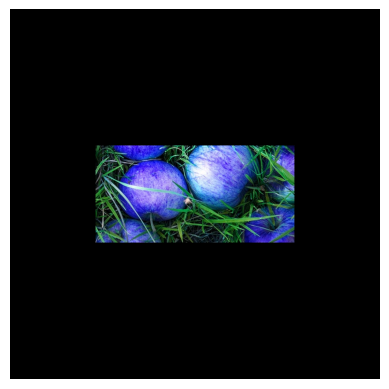

In [6]:

# Create an empty canvas
canvas = np.zeros((640, 640, 3), dtype=np.uint8)

center_x = 320
center_y = 320

image = cv2.imread("data/cleaned_images/apple/cropped_train_image_363574_13.jpg")

image_width = image.shape[1]
image_height = image.shape[0]

# print(image_width)
# print(image_height)

start_x = int(center_x - (image_height/2))
end_x = int(start_x + image_height)

start_y = int(center_y - (image_width/2))
end_y = int(start_y + image_width)

# print(start_x)
# print(end_x)

# print(start_y)
# print(end_y)

canvas[start_x:end_x, start_y:end_y] = image

# Display the canvas
plt.imshow(canvas)
plt.axis('off')  # Turn off axis
plt.show()


## Nework architecture

### Examples

In [ ]:

# Example 1

### simple feedforward neural network with fully connected layers ###

# Feedforward neural networks are typically used for tasks where the input data is represented as a flat vector, such as tabular data or 
# pre-extracted features. In the context of image data, the approach of flattening the image into a vector and feeding it directly into a 
# feedforward neural network is often less effective compared to using convolutional neural networks (CNNs).

# network consists of sequence of 2 Dense layers, which are densely/fully connected
network = models.Sequential()

# (28 * 28,) corresponds to a 1D shape of length 784. This means the input data is expected to be a flat vector of length 784 
# (such as flattened images with dimensions 28x28).
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

# softmax = array of 10 probability scores
network.add(layers.Dense(10, activation='softmax'))


In [ ]:

# Example 2

model = models.Sequential()

# This layer will return a tensor where the first dimension has been trans- formed to be 32.
# the default activation function is the linear activation function
# Here, input_shape=(784,) specifies the shape of the input data expected by the first layer of the model. 
# Similarly, (784,) corresponds to a 1D shape of length 784. This also means the input data is expected to be a flat vector of length 784.
model.add(layers.Dense(32, input_shape=(784,)))

# Thus this layer can only be connected to a downstream layer that expects 32- dimensional vectors as its input.
# # the default activation function is the linear activation function
model.add(layers.Dense(32))


In [ ]:

# Example 3

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

# And here’s the same model defined using the functional API:

input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)


In [ ]:

# Example 4

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,))) model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# l1
# regularizers.l1(0.001)

# simultaneous
# regularizers.l1_l2(l1=0.001, l2=0.001)


In [ ]:

# Example 5

### a feedforward neural network with fully connected layers, but with the addition of dropout regularization. ###

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# a dot product (dot) between the input tensor and a tensor named W
# an addition (+) between the resulting 2D ten- sor and a vector b
# a relu operation. relu(x) is max(x, 0)
output = relu(dot(W, input) + b)


### Own convnet

In [2]:

# current vs. MNIST
# You’ll reuse the same general structure as for the MNIST: the convnet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers.
# But because you’re dealing with bigger images and a more complex problem, you’ll make your network larger, accordingly: it will have one more Conv2D + MaxPooling2D stage. 

model = models.Sequential()

# How to decide input shape of the Conv2D keras layer? => 640x640 For more information, see the padding section.
# This serves both to augment the capacity of the network and to further reduce the size of the feature maps so they aren’t overly large when you reach the Flatten layer. 

# Convolution operate over 2D tensors called FEATURE MAPS with two SPATIAL AXIS (height, width) and DEPTH AXIS (= channel axes; *note: 3 = RGB and 1=greyscale)
# convnet learns local patterns found in a small 2D windows of inputs layer Conv2D

# this layer takes FEATURE MAP of size (640, 640, 3); *note: input could be the original image or the output of the previous layer
# and outputs the FEATURE MAP of size (638, 638, 32)

# It computes 32 filters over its input. It means convolution filter is applied to the input FEATURE MAP.
# The convolution filter is moved across the input FEATURE MAP in a sliding window fashion. 
# convolutin works by sliding the windows of size (3, 3) and (2, 2) over the 3D input feature map.
# Stopping at evry possible location
# and extracting 3D patch of surrounding features of shape (window_height, window_width, input_dept)
# in other words:
# When the filter is applied to a particular position of the input FEATURE MAP, it extracts a patch from the input data, that corresponds to the receptive field of the filter.
# This patch is a subregion of the input FEATUERE MAP, that is the same size as the filter.

# Each such 3D patch is then transformed
# (via a tensor product with the same learned weight matrix, called the convolution kernel)
# into a 1D vector of shape (output_depth)
# in other words
# The convolution operation computes the DOT PRODUCT between the filter and the patxh extracted frm the input FEATURE MAP.

# All of these vectors are then spatially reassembled into a 3D output map of shape (height, width, output_depth). Every spatial location in the output feature map corresponds to the same
# location in the input feature map.
# (The lower right corner of the output contains information about the lower right corner of the input.)
# (For instance, with 3x3 windows, the vector output[i, j, :] comes from the 3D patch input[i-1:i+1,j-1:j+1,:].)

# Different filters learn to detect different patterns, and their responses collectivelly form the output FEATURE MAP of the convolution layer.

# Each of these output channels contains 638x638 grid of values, which is a RESPONSE MAP of the filter over the input.
# Here is what the term FEATURE MAP means: every dimension in the DEPTH AXIS is a feature (or filter), and the 2D
# tensor output[:, :, n] is the 2D SPATIAL MAP of the response of tis filter over the input

# BORRDER EFFECTS
# Consider 5x5 feature map (25 tiles total)
# There are only 9 tiles around which you can center a 3x3 window, forming a 3x3 grid.
# It shrinks by two tiles alongside each dimension.
# You start with 28x28 inputs, which become 26x26 after the first convolution layer.

# DEPTH 32 = the no. of filters computed
# (3, 3) = size of the PATCHES extracted from the input
# Conv2D(output_depth, (window_height, window_width) )

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(640, 640, 3)))

# the max pooling operation
# The size of the FEATURE MAPS is halved after every MaxPooling2D layer
# i.e. from 638x638 to 319x319
# The role of the max pooling is to aggresively downsample feature maps.
# It consists of extracting windows from the input feature maps and outputting the max value of each channel.
# It is conceptually similar to convolution, except that instead of transforming local patches via a leaned linear transformation (the convolution kernel), they are transformed via a hard
# coded max tensor operation.
# A big difference from convolution is that max pooling is usually done with 2x2 windows and stride 2 in order to downsample the feature maps by a factor of 2.
# Convolution is typically done with 3x3 windows and no stride (stride 1)
# The reason to use downsampling is to reduce the number of feature map coefficients to process, as well as to induce spatial filter hierarchies by making successive convolution layers 
# look at increasingly large windows (in terms of the fraction of the original input they cover).

# (2, 2) = size of the PATCHES extracted from the input

model.add(layers.MaxPooling2D((2, 2)))

# The output of MaxPooling2D layer is a 3D tensor of shape (height, width, channels). 
# The width and height dimensions tend to shrink as you go deeper in the network. 
# The number of channels is controlled by the first argument passed to the Conv2D layers (32 or 64).

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

# Because you’re attacking a binary-classification problem, you’ll end the network with a single unit (a Dense layer of size 1) and a sigmoid activation. 
# This unit will encode the probability that the network is looking at one class or the other.
model.add(layers.Dense(1, activation='sigmoid'))


In [3]:

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 638, 638, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 319, 319, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 317, 317, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 158, 158, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 156, 156, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 78, 78, 128)       0

In [4]:

# For the compilation step, you’ll go with the RMSprop optimizer, as usual. 
# Because you ended the network with a single sigmoid unit, you’ll use binary crossentropy as the loss (as a reminder, check out table 4.1 for a cheatsheet on what loss 
# function to use in various situations).

model.compile(loss='binary_crossentropy',
                  optimizer="Adam",  # optimizers.RMSprop(learning_rate=1e-4),
                  metrics=['acc'])

# network.compile(optimizer='rmsprop',
#                 loss='categorical_crossentropy',
#                 metrics=['accuracy'])

# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss='mse',
#               metrics=['accuracy'])


## Train, validate, test split

In [5]:

# Each split contains the same number of samples from each class: this is a bal- anced binary-classification problem, which means classification accuracy will be an appropriate 
# measure of success.

cup_categoory_id = 1
apple_category_id = 2

cups_images_names = []
apples_images_names = []

for image_name in os.listdir("data/images_with_padding/cup"):
    cups_images_names.append(image_name)

for image_name in os.listdir("data/images_with_padding/apple"):
    apples_images_names.append(image_name)
    
train_cups_images_names = cups_images_names[:1000]
train_cups_images_labels = np.ones(1000) # example array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

test_cups_images_names = cups_images_names[1000:1500]
test_cups_images_labels = np.ones(500)

validate_cups_images_names = cups_images_names[1500:2000]
validate_cups_images_labels = np.ones(500)

print(f"total train cup images {len(train_cups_images_names)}")
print(f"total test cup images {len(test_cups_images_names)}")
print(f"total validate cup images {len(validate_cups_images_names)}")

train_apples_images_names = apples_images_names[:1000]
train_apples_images_labels = np.ones(1000) * 2

test_apples_images_names = apples_images_names[1000:1500]
test_apples_images_labels = np.ones(500) * 2

validate_apples_images_names = apples_images_names[1500:2000]
validate_apples_images_labels = np.ones(500) * 2

print(f"total train apple images {len(train_apples_images_names)}")
print(f"total test apple images {len(test_apples_images_names)}")
print(f"total validate apple images {len(validate_apples_images_names)}")


total train cup images 1000
total test cup images 500
total validate cup images 500
total train apple images 1000
total test apple images 500
total validate apple images 500


### Train cups

.DS_Store
1000
999


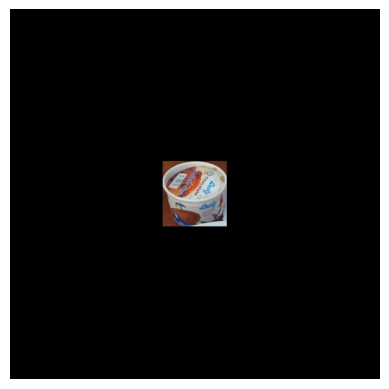

In [7]:

# Read the picture files.
# Decode the JPEG content to RGB grids of pixels.
# Convert these into floating-point tensors.
# Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal 
# with small input values).

#  Keras has a module with image-processing helper tools, located at keras.preprocessing.image. 
# In particular, it contains the class ImageDataGenerator, which lets you quickly set up Python generators that can 
# automatically turn image files on disk into batches of preprocessed tensors.

train_cups_images = prepare_images_for_convnet("data/images_with_padding/cup/", train_cups_images_names)
del train_cups_images_names


### Test cups

500
500


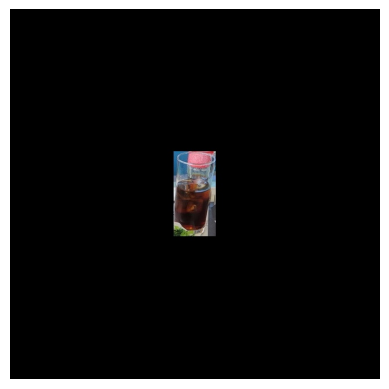

In [8]:

test_cups_images = prepare_images_for_convnet("data/images_with_padding/cup/", test_cups_images_names)
del test_cups_images_names


### Validate cups

500
500


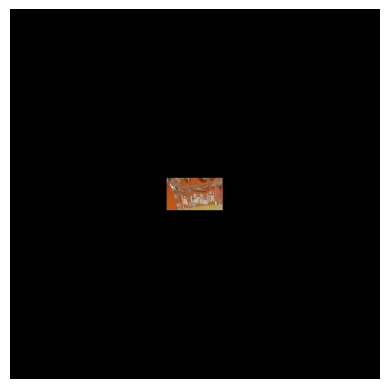

In [9]:

validate_cups_images = prepare_images_for_convnet("data/images_with_padding/cup/", validate_cups_images_names)
del validate_cups_images_names


### Train apples

1000
1000


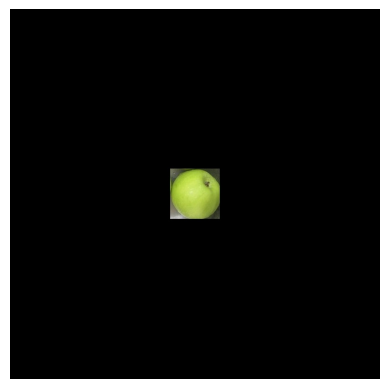

In [10]:

train_apples_images = prepare_images_for_convnet("data/images_with_padding/apple/", train_apples_images_names)
del train_apples_images_names


### Test apples

500
500


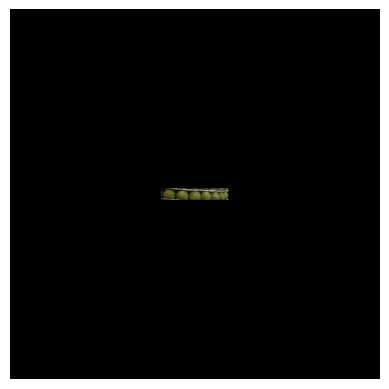

In [11]:

test_apples_images = prepare_images_for_convnet("data/images_with_padding/apple/", test_apples_images_names)
del test_apples_images_names


### Validate apples

500
500


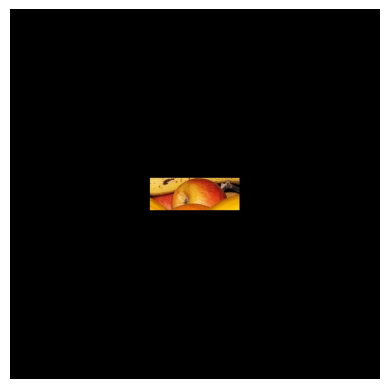

In [12]:

validate_apples_images = prepare_images_for_convnet("data/images_with_padding/apple/", validate_apples_images_names)
del validate_apples_images_names


In [ ]:

# merge data
train_images = np.concatenate((train_apples_images, train_cups_images))
del train_apples_images
del train_cups_images

train_labels = np.concatenate((train_apples_images_labels, train_cups_images_labels))
del train_apples_images_labels
del train_cups_images_labels

test_images = np.concatenate((test_apples_images, train_cups_images))
del test_apples_images
del train_cups_images

test_labels = np.concatenate((test_apples_images_labels, test_cups_images_labels))
del test_apples_images_labels
del test_cups_images_labels

validate_images = np.concatenate((validate_apples_images, validate_cups_images))
del validate_apples_images
del validate_cups_images

validate_labels = np.concatenate((validate_apples_images_labels, validate_cups_images_labels))
del validate_apples_images_labels
del validate_cups_images_labels


## Fit

In [18]:

# X_train = images
# y_train = labels

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


ZeroDivisionError: division by zero

In [ ]:

model.save('cats_and_dogs_small_1.h5')


In [ ]:

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:

test_loss, test_acc = network.evaluate(test_images, test_labels)


## Optimization - data augmentation

In [ ]:

# DL with Python
# p. 138 - 142


# convnets - MNIST dataset

In [ ]:

from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras import optimizers

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [ ]:
train_images

In [ ]:
train_images[0]

In [ ]:

plt.imshow(train_images[0])
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
train_labels

In [ ]:
len(train_labels)

In [ ]:
len(train_images[0])

In [ ]:
train_images.shape

In [ ]:
train_labels.shape

In [ ]:

# resape and scale
train_images = train_images.reshape((60000, 28 * 28))

# Since pixel values in typical images are in the range of 0 to 255 (for 8-bit images), dividing by 255 scales the pixel values to 
# the range [0, 1]. This is known as normalization.
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [ ]:

# The function to_categorical is typically used when dealing with classification tasks
# It converts class labels into one-hot encoded vectors

# In classification tasks, especially with neural networks, the output layer usually has neurons corresponding to each class. 
# For example, if you have 10 classes, you would have 10 output neurons, each representing the probability of belonging to a particular class.

# One-hot encoding is a binary representation of categorical variables where each class is represented by a binary vector. 
# In this representation, only one bit is high (1) while all others are low (0). This helps the network to understand the categorical 
# nature of the output and interpret it correctly during training.
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:

train_labels


# Visualizing what convnets learn

In [ ]:

# p. 160 - 177
